In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from package.Data import Dataset
from package.Kernels import AnalysisECG
import numpy as np
import pandas as pd

In [3]:
dataset = Dataset(pd.read_csv('ecg_70.txt', index_col=0, sep=' ').T)
dataset = AnalysisECG().fit(dataset)

 73%|███████▎  | 51/70 [02:33<00:51,  2.72s/it]

 87%|████████▋ | 61/70 [03:00<00:23,  2.57s/it]

100%|██████████| 70/70 [03:25<00:00,  2.94s/it]


In [4]:
dataset.save(name='ecg_70_analysis')

In [ ]:
# Sacar etiquetas con codigo henry
# 

  0%|          | 0/5 [00:00<?, ?it/s]/opt/anaconda3/envs/ser/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(
/opt/anaconda3/envs/ser/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/opt/anaconda3/envs/ser/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:289: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  est = KMeans(
100%|██████████| 5/5 [00:00<00:00, 51.74it/s]
OMP: Info #273: omp_set_nested routine depre

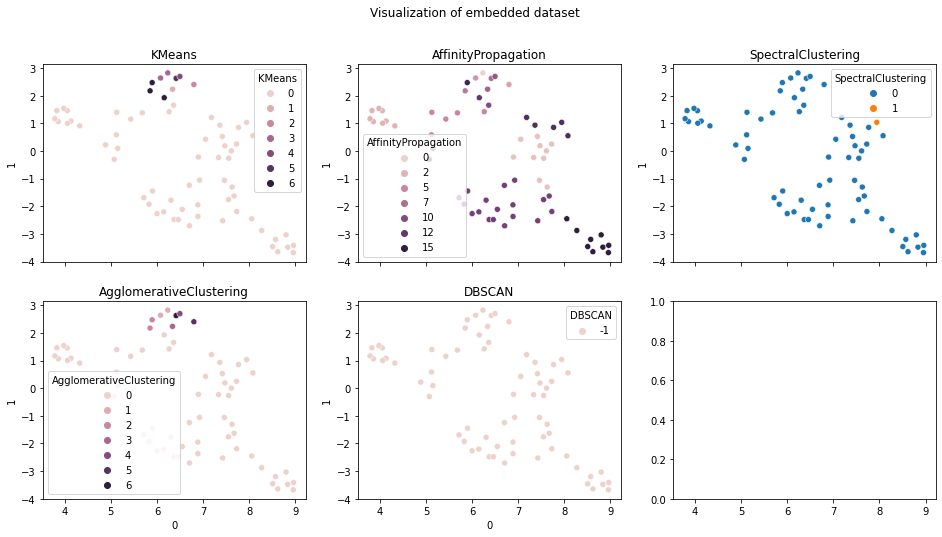

In [6]:
from package.Clustering import Cluster
from sklearn.cluster import KMeans, AffinityPropagation, SpectralClustering, AgglomerativeClustering, DBSCAN

cluster = Cluster([
        KMeans(7), 
        AffinityPropagation(damping=0.5),  # Damping 0.5-1
        SpectralClustering(n_clusters=7), 
        AgglomerativeClustering(n_clusters=7),
        DBSCAN(eps=0.5)
    ])

clusterDataset = cluster.fit(dataset)
from package.Visualization import Visualization
vis = Visualization()

vis.plot(clusterDataset)